In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/code_colab/sonar.csv',header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [3]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [4]:
# x data:scaling
from sklearn.preprocessing import StandardScaler
X_scaled=StandardScaler().fit_transform(df.iloc[:, :-1].values)

In [5]:
# Y data:label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2, random_state=seed
)


- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- case 1) 은닉층 2개

In [10]:
model1=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(12,activation='relu'),   #은닉층
    Dense(1,activation='sigmoid') 
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                4880      
                                                                 
 dense_4 (Dense)             (None, 12)                972       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [11]:
params1=5865

In [14]:
model1.compile('adam','binary_crossentropy',metrics=['accuracy'])
hist1=model1.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=0)

In [15]:
model1.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.8333


[0.42907625436782837, 0.8333333134651184]

In [16]:
params1,acc1=5865,0.8333

- case2)은닉층 4개

In [17]:
model2=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(48,activation='relu'), 
    Dense(20,activation='relu'),
    Dense(8,activation='relu'),  
    Dense(1,activation='sigmoid') 
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                4880      
                                                                 
 dense_7 (Dense)             (None, 48)                3888      
                                                                 
 dense_8 (Dense)             (None, 20)                980       
                                                                 
 dense_9 (Dense)             (None, 8)                 168       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile('adam','binary_crossentropy',metrics=['accuracy'])
hist2=model2.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=0)

In [19]:
model2.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.7439 - accuracy: 0.8333


[0.7438634634017944, 0.8333333134651184]

In [ ]:
params2,acc2=9925,0.8333

- case3)은닉층 6개

In [20]:
model3=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(60,activation='relu'), 
    Dense(40,activation='relu'),
    Dense(24,activation='relu'),
    Dense(10,activation='relu'),
    Dense(4,activation='relu'),  
    Dense(1,activation='sigmoid') 
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                4880      
                                                                 
 dense_12 (Dense)            (None, 60)                4860      
                                                                 
 dense_13 (Dense)            (None, 40)                2440      
                                                                 
 dense_14 (Dense)            (None, 24)                984       
                                                                 
 dense_15 (Dense)            (None, 10)                250       
                                                                 
 dense_16 (Dense)            (None, 4)                 44        
                                                                 
 dense_17 (Dense)            (None, 1)                

In [31]:
model3.compile('adam','binary_crossentropy',metrics=['accuracy'])
hist3=model3.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=0)
model3.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.3694 - accuracy: 0.8095


[1.369390606880188, 0.8095238208770752]

In [26]:
params3,acc3=13463,0.8095

- case4)은닉층 8개

In [23]:
model4=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(64,activation='relu'), 
    Dense(48,activation='relu'),
    Dense(36,activation='relu'),
    Dense(28,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10,activation='relu'),
    Dense(4,activation='relu'),  
    Dense(1,activation='sigmoid') 
])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                4880      
                                                                 
 dense_19 (Dense)            (None, 64)                5184      
                                                                 
 dense_20 (Dense)            (None, 48)                3120      
                                                                 
 dense_21 (Dense)            (None, 36)                1764      
                                                                 
 dense_22 (Dense)            (None, 28)                1036      
                                                                 
 dense_23 (Dense)            (None, 16)                464       
                                                                 
 dense_24 (Dense)            (None, 10)               

In [30]:
model4.compile('adam','binary_crossentropy',metrics=['accuracy'])
hist4=model4.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=0)
model4.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.5588 - accuracy: 0.7619


[0.558800995349884, 0.761904776096344]

In [27]:
params4,acc4=16667,0.8333

학습과정 시각화

In [32]:
y_acc1=hist1.history['accuracy']
y_acc2=hist2.history['accuracy']
y_acc3=hist3.history['accuracy']
y_acc4=hist4.history['accuracy']
y_vloss1=hist1.history['val_loss']
y_vloss2=hist2.history['val_loss']
y_vloss3=hist3.history['val_loss']
y_vloss4=hist4.history['val_loss']
xs=np.arange(1,len(y_acc1)+1)

(Text(0.5, 0, 'Epoch'), Text(0.5, 1.0, 'Trainset accuracy'))

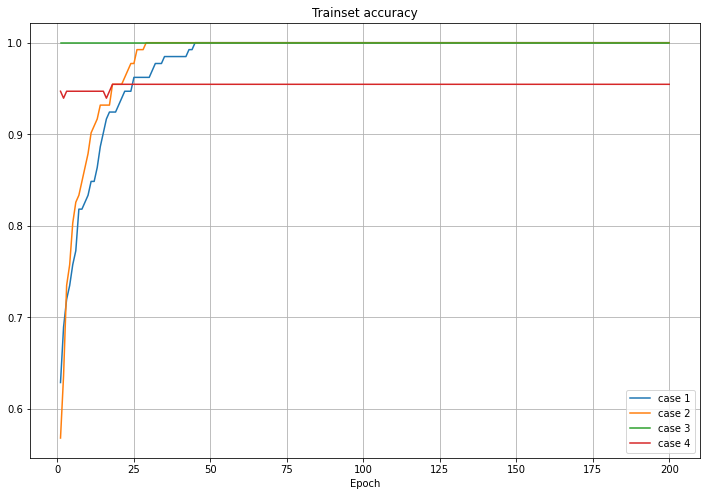

In [33]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc1,label='case 1')
plt.plot(xs,y_acc2,label='case 2')
plt.plot(xs,y_acc3,label='case 3')
plt.plot(xs,y_acc4,label='case 4')

plt.legend(),
plt.grid(),
plt.xlabel('Epoch'),plt.title('Trainset accuracy')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 

(Text(0.5, 0, 'Epoch'), Text(0.5, 1.0, 'vloss'))

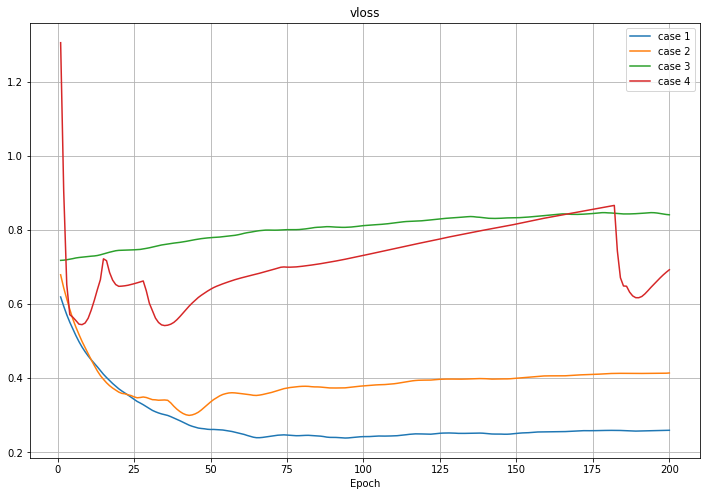

In [34]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_vloss1,label='case 1')
plt.plot(xs,y_vloss2,label='case 2')
plt.plot(xs,y_vloss3,label='case 3')
plt.plot(xs,y_vloss4,label='case 4')

plt.legend(),
plt.grid(),
plt.xlabel('Epoch'),plt.title('vloss')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 

- case 2에 대해서 베스트 모델

In [35]:
model2=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(48,activation='relu'), 
    Dense(20,activation='relu'),
    Dense(8,activation='relu'),  
    Dense(1,activation='sigmoid') 
])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 80)                4880      
                                                                 
 dense_28 (Dense)            (None, 48)                3888      
                                                                 
 dense_29 (Dense)            (None, 20)                980       
                                                                 
 dense_30 (Dense)            (None, 8)                 168       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [38]:
model1.compile('adam','binary_crossentropy',metrics=['accuracy'])


- 베스트 모델만 저장하는 콜백 함수

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5',monitor='val_loss', 
                     verbose=1,
                     save_best_only=True)

In [ ]:
#에포크 종료시마다 콜백 함수를 실행하도록 설정
hist1=model1.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=0,
                 callbacks=[mc])

In [41]:
model1.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.8571


[0.5925367474555969, 0.8571428656578064]

In [42]:
from tensorflow.keras.models import load_model

best_model=load_model('sonar_best.h5')
best_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4301 - accuracy: 0.8333


[0.43012601137161255, 0.8333333134651184]

(Text(0.5, 0, 'Epoch'), Text(0.5, 1.0, 'vloss'))

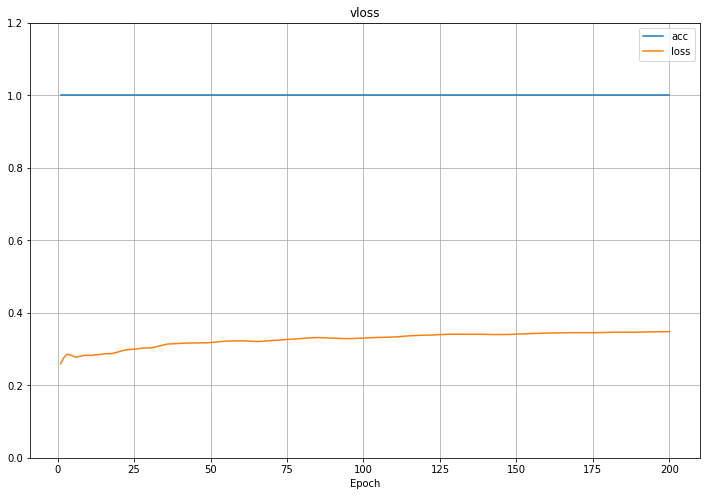

In [44]:
y_acc=hist1.history['accuracy']
y_vloss=hist1.history['val_loss']
xs=np.arange(1,len(y_acc)+1)
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='acc')

plt.plot(xs,y_vloss,label='loss')
plt.ylim([0,1.2])
plt.legend(),
plt.grid(),
plt.xlabel('Epoch'),plt.title('vloss')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 

- 조기 종료 콜백 함수

In [47]:
model6=Sequential([
    Dense(80,input_dim=60,activation='relu'), 
    Dense(48,activation='relu'), 
    Dense(20,activation='relu'),
    Dense(8,activation='relu'),  
    Dense(1,activation='sigmoid') 
])
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                4880      
                                                                 
 dense_33 (Dense)            (None, 48)                3888      
                                                                 
 dense_34 (Dense)            (None, 20)                980       
                                                                 
 dense_35 (Dense)            (None, 8)                 168       
                                                                 
 dense_36 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [48]:
model6.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5',monitor='val_loss', 
                     verbose=1,
                     save_best_only=True)
es=EarlyStopping(patience=20) 
#제일 좋은 값 이후 20번 동안 더 좋은 게 안 나오면 스톱.

In [ ]:
hist6=model6.fit(X_train,Y_train,validation_split=0.2,
                 epochs=200,batch_size=100,verbose=1,
                 callbacks=[mc,es])


In [51]:
best_model=load_model('sonar_best.h5')
best_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.5921 - accuracy: 0.8333


[0.5921090841293335, 0.8333333134651184]